In [1]:
# %config InlineBackend.figure_formats = ['svg']
# %matplotlib inline

import numpy as np
import numpy.polynomial.legendre as npl
import matplotlib.pyplot as plt

from functools import reduce

## Define functions for Legendre coefficients calculation

In [2]:
def legendre_eval(C, ctl, ctk, phi):
    phi = (phi - np.pi) / np.pi # Have to rescale phi to range -1 to 1
    return npl.legval3d(ctl, ctk, phi, C)


def find_coeff(data, order=4):
    i_s = j_s = k_s = np.arange(order + 1, dtype=np.float64)
    ijk_grid = np.meshgrid(i_s, j_s, k_s, sparse=True)
    c_ijk = reduce(np.multiply, (2 * ijk_grid[ith] + 1 for ith in range(3)))
    c_ijk /= float(8 * data.shape[0])

    x = data[:,0]
    y = data[:,1]
    z = data[:,2] / np.pi - 1 # rescale phi values 

    V = npl.legvander3d(x, y, z, deg=[order]*3)
    C = np.sum(V * c_ijk.flat, axis=0).reshape([order + 1]*3)
    
    print('V, c', V.shape, c_ijk.shape)
    return C

In [3]:
# projection functions

def legendre_eval_project_1D(C, x, i):
    slices = [0] * 3
    slices[i] = slice(None)
    return npl.legval(x, C[slices[0],slices[1],slices[2]])


def legendre_eval_project_2D(C, x, y, i, j):
    slices = [0] * 3
    slices[i] = slices[j] = slice(None)
    return npl.legval2d(x, y, C[slices[0],slices[1],slices[2]])

## Test functions

V, c (1000, 729) (9, 9, 9)


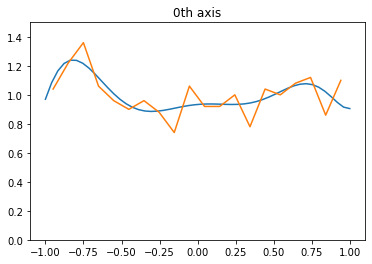

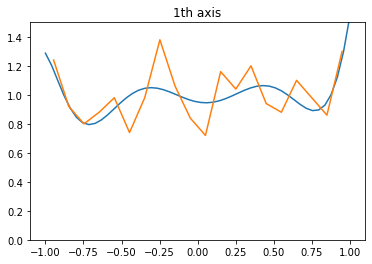

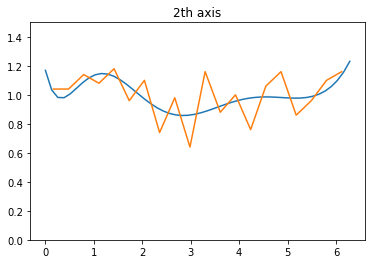

In [4]:
# constant

x = np.random.uniform(-1, 1, (1000, 3))
x[:,2] = (x[:,2] + 1) * np.pi
C = find_coeff(x, order=8)

def plot_projection(i):
    plt.figure(figsize=(6, 4))
    
    x_eval = np.linspace(-1, 1, 50)
    h_eval = legendre_eval_project_1D(C, x_eval, i)
    if i == 2:
        x_eval = (x_eval + 1) * np.pi
    
    plt.plot(x_eval, h_eval / np.mean(h_eval))

    h_data, edges_data = np.histogram(x[:,i], bins=20)
    centers_data = (edges_data[:-1] + edges_data[1:]) / 2
    plt.plot(centers_data, h_data / np.mean(h_data))

    plt.title(f'{i}th axis')
    plt.ylim(0, 1.5)
    plt.show()

for j in range(3):
    plot_projection(j)

## 2D plot

In [5]:
# x = np.random.uniform(-1, 1, (1000, 3))
x = np.zeros((20000, 3))
x[:10000,:] = np.random.normal(-0.3, 0.3, (10000, 3))
x[10000:,:] = np.random.normal(0.3, 0.3, (10000, 3))
x[x < -1] = -1
x[x > 1] = 1
x[:,2] = (x[:,2] + 1) * np.pi
C = find_coeff(x, order=7)
C.shape

V, c (20000, 512) (8, 8, 8)


(8, 8, 8)

In [6]:
x_eval = np.linspace(-1, 1, 100)
xy_eval = np.meshgrid(x_eval, x_eval)
h_eval = legendre_eval_project_2D(C, *xy_eval, 0, 1)
h_eval.shape

(100, 100)

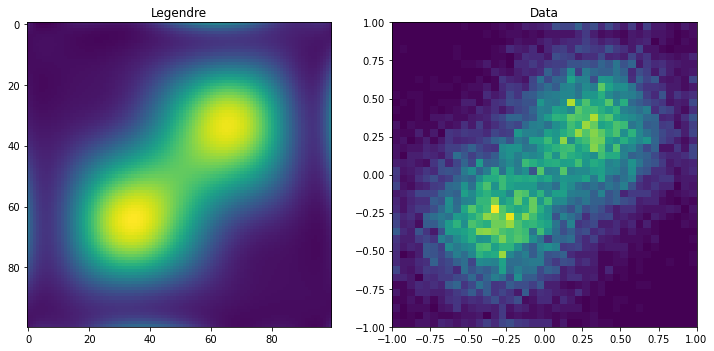

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Legendre')
plt.imshow(h_eval[::-1,:])
plt.subplot(122)
plt.title('Data')
plt.hist2d(x[:,0], x[:,1], bins=40)
plt.gca().set_aspect('equal')